In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Line plot
#Use the House price data
prices = {'Ohio': [392, 372, 396, 404, 450, 412, 447, 410, 424, 425, 415, 435],
'Texas': [458, 492, 502, 509, 525, 528, 553, 502, 405, 450, 473, 449],
'Maryland': [430, 390, 419, 455, 476, 482, 490, 464, 513, 518, 580, 593],
'Virginia': [429, 415, 456, 459, 442, 488, 517, 514, 549, 549, 601, 628],
'California': [476, 555, 590, 524, 565, 586, 593, 635, 652,660, 653, 649]
}
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(prices,index=months)

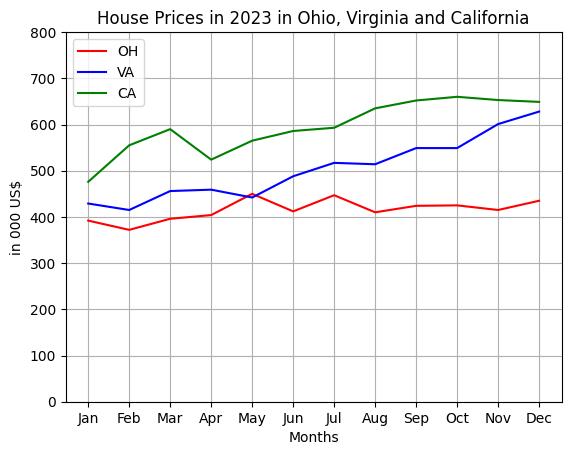

In [22]:
#Line plot
fig = plt.figure()
ax = plt.axes()
ax.grid(True)
#Our x-axis is the months list
#Our y-axis is one of the columns in the dataframe (df['Ohio'])
ax.plot(months, df['Ohio'], color='red', label = 'OH')
ax.plot(months, df['Virginia'], color='blue', label = 'VA')
ax.plot(months, df['California'], color = 'green', label = 'CA')
ax.set_ylim(0, 800);
ax.set_title('House Prices in 2023 in Ohio, Virginia and California')   # Add a title
ax.set_xlabel('Months')          # Add x label
ax.set_ylabel('in 000 US$');
ax.legend()

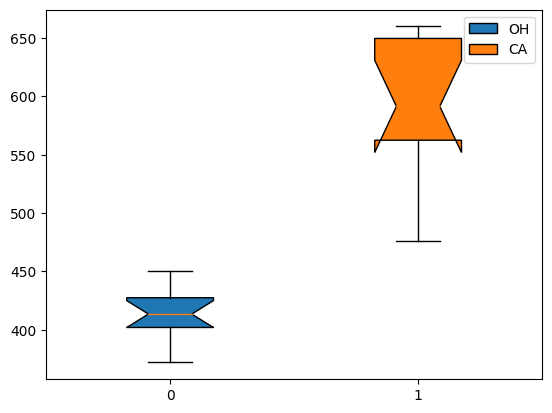

In [23]:
#Box plot
fig, ax = plt.subplots()
#ax.boxplot(df['Ohio'])
bp1 = ax.boxplot(df['Ohio'], positions=[0],  notch=True, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C0"))
bp2 = ax.boxplot(df['California'],positions=[1], notch=True, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C1"))
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["OH", "CA"], loc='upper right')
plt.show()

In [24]:
#Bar charts
df = pd.read_csv('customer_shopping_data.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [26]:
category = df['category'].unique()
for acat in category:
  print(acat)

Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


In [45]:
dfgcat = df.groupby('category').sum()
dfgcat['price']

<ipython-input-45-c2a8ae00a742>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfgcat = df.groupby('category').sum()


category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

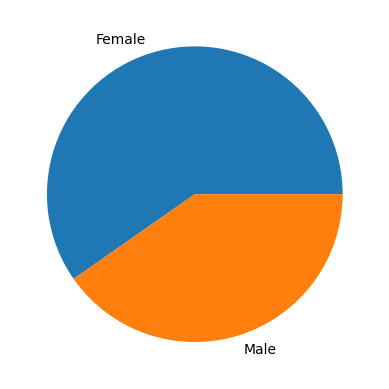

In [33]:
#Visualize the data using pie chart
values = dfgcat['price']
names = dfgcat.index
fig = plt.figure()
ax = plt.axes()
ax.pie(values, labels = names);

<BarContainer object of 8 artists>

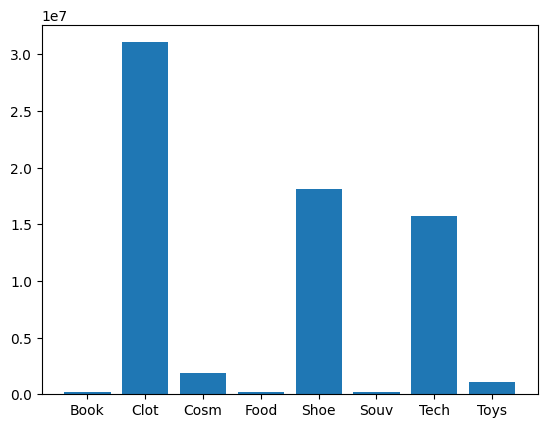

In [48]:
#Bar chart to represent categorical data
fig = plt.figure()
ax = plt.axes()
values = dfgcat['price'].values
names =  dfgcat.index
shortendNames = []
for aname in names:
  shortendNames.append(aname[:4])
ax.bar(shortendNames, values)

In [49]:
#Groupby does not segregate the data as we would like it to be.
#We want to have breakdown by category and gender
#We use pivot
dfpiv = df.pivot_table(index="category", columns="gender", values="price", aggfunc=[np.sum], fill_value=0)
dfpiv.head()

sum             
gender                Female         Male
category                                 
Books              132956.40     94020.90
Clothing         18616663.12  12459021.52
Cosmetics         1108432.26    740174.64
Food & Beverage    137873.26     93695.45
Shoes            10746644.02   7388692.87

In [57]:
#Scatter plot is used to see the relationship (or lack of it) between columns of data
economicData = {'House Prices': [392, 402, 406, 411, 407, 422, 417, 430, 432, 455, 468, 459],
'Inflation': [4.78, 5.42, 5.47, 5.59, 5.52, 5.58, 6.05, 6.22, 6.15, 6.35, 6.47, 6.39],
'InterestRate': [2.58, 2.42, 2.47, 2.59, 2.52, 2.58, 2.55, 2.22, 2.15, 2.35, 2.47, 2.39],
'Gas Price': [3.58, 3.92, 4.29, 4.59, 4.25, 4.28, 4.53, 4.02, 4.05, 3.50, 3.73, 3.49]
}
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(economicData,index=months)

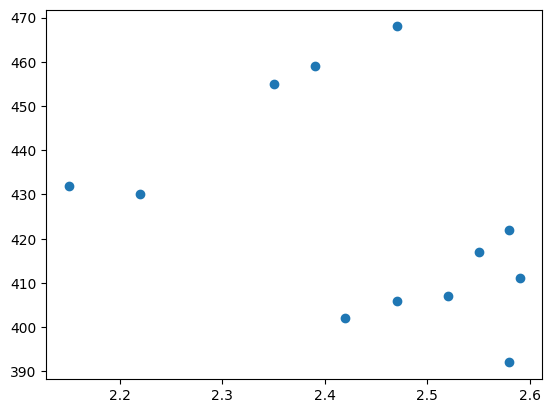

In [61]:
#Show the relation between interestrate and house prices.
#We want to test if house prices depend on interest  rates /inflation
#Interest rate is the independent variable (the x-axis)
#House prices is the dependent variable (Y-axis)
ax.set_title('Hypothesis Test')   # Add a title
ax.set_xlabel('Inflation')          # Add x label
ax.set_ylabel('House prices in 000 US$');
y = df['House Prices']
x = df['InterestRate']
fig, ax = plt.subplots()
ax.scatter(x, y);

In [60]:
#Pandas corr to tell how much correlation exists between two columns in a dataframe
print('Correlation between inflation and gas price:', df['Inflation'].corr(df['Gas Price']))
print('Correlation between inflation and house prices:', df['Inflation'].corr(df['House Prices']))
print('Correlation between House Prices and interest rate:', df['House Prices'].corr(df['InterestRate']))


Correlation between inflation and gas price: -0.22950042929810244
Correlation between inflation and house prices: 0.9063322268236621
Correlation between House Prices and interest rate: -0.41137554904280343
